In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


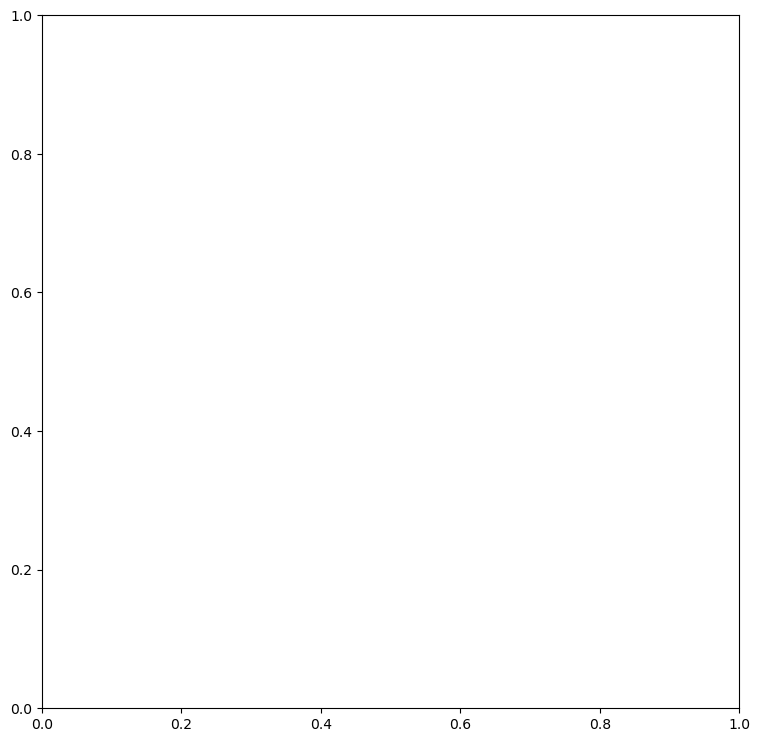

In [3]:
fig, ax = plt.subplots(figsize = (9, 9))

In [4]:
ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

In [5]:
def generate_yrs(orig):
    
    yrs_to_add = []

    start = 2014
    end = 2050
    i = start

    while i <= end:
        yrs_to_add.append(i)
        i += 1

    yrs = pd.concat([orig, pd.Series(yrs_to_add)])
    
    return yrs

In [6]:
lr_result = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
slope = lr_result.slope
intercept = lr_result.intercept
yrs = generate_yrs(df['Year'])

In [7]:
ax.plot(yrs, intercept + slope * yrs)

In [8]:
df_2000s = df[df.Year >= 2000]

In [9]:
lr_result_2000s = linregress(df_2000s['Year'], df_2000s['CSIRO Adjusted Sea Level'])
slope_2000s = lr_result_2000s.slope
intercept_2000s = lr_result_2000s.intercept
yrs_2000s = generate_yrs(df_2000s['Year'])

In [10]:
ax.plot(yrs_2000s, intercept_2000s + slope_2000s * yrs_2000s)

In [13]:
ax.set_title('Rise in Sea Level')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')

Text(79.47222222222221, 0.5, 'Sea Level (inches)')

In [16]:
fig.savefig('scatterplot.png')